In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import csv
import os

In [18]:
def circ(t):
    if t < 0.5:
        return t
    return 1-t

def K_circ(t,ps):
    total = 0
    for i, p in enumerate(ps):
        for j, q in enumerate(ps):
            if i!=j and circ(abs(p-q)) < t:
                total += 1
    return total / len(ps)**2

def rust_k_circ(ts, vs):
    with open("temp.csv" , mode= "w") as f:
        wtr = csv.writer(f)

        wtr.writerow(ts)
        wtr.writerow(vs)

    rust_path = "~/Documents/HML/cleaning/ABM/fp/ripleys_k/target/release/ripleys_k"
    current_path = os.getcwd()
    
    os.system(f"{rust_path} {current_path}/temp.csv {current_path}/temp_out.csv 1")

    with open("temp_out.csv") as f:
        reader = csv.reader(f)

        for v in reader:
            out = [float(a) for a in v]
            break
    
    os.system(f"rm {current_path}/temp.csv")
    os.system(f"rm {current_path}/temp_out.csv")
    return out

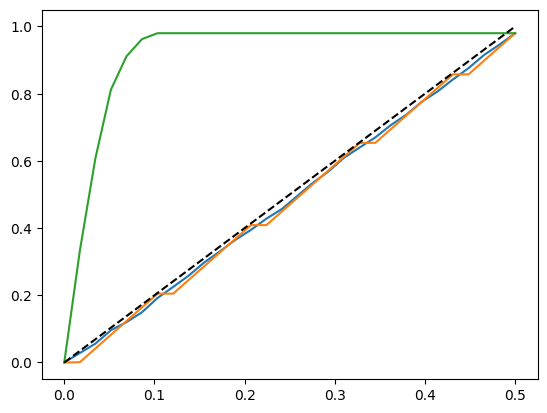

In [20]:
rand = np.random.rand(50)
unif = np.linspace(0,1,50)
clump = [0.4+(np.random.rand()-0.5)*0.1 for _ in range(50)]

ts = np.linspace(0,0.5,30)

rand_ks = rust_k_circ(ts,rand)
unif_ks = rust_k_circ(ts,unif)
clump_ks = rust_k_circ(ts,clump)

plt.plot(ts,rand_ks)
plt.plot(ts,unif_ks)
plt.plot(ts,clump_ks)
plt.plot(ts,2*ts,color = "black", linestyle="dashed")